# Import Dependencies

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

C:\Users\Nitro\AppData\Local\Temp\ipykernel_13348\508866813.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Remove dodgy images

In [2]:
data_dir = 'data'
print(os.listdir(data_dir))
print(os.listdir(os.path.join(data_dir, 'happy')))

['happy', 'sad']
['05-12-21-happy-people.jpg', '110754-utyeqqosky-1547658396.jpeg', '170404-happy-workers-feature.jpg', '1HEoLBLidT2u4mhJ0oiDgig.png', '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg', '343515-worldhappinessreport1440.jpg', '35438_hd.jpg', '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png', '56f455011e0000b300705475.jpeg', '64e6493fabee0989273d5429b3fc0a7a0bc7f25aa29851bc5d90410a14b3efc5._RI_TTW_.jpg', '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg', '960x0-1.jpg', '9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg', 'A_Sep20_14_1189155141.jpg', 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg', 'compassion.jpg', 'Dollarphotoclub_76084977-1.jpg', 'Duggar-Family-Secrets-Are-Exposed-in-New-Docuseries-Featuring-Jill-and-Amy-featured.png', 'dv2051009.jpg', 'file-20230208-27-3jttof.jpg', 'friends-happy-190821-1490x838.jpg', 'friends_190412.jpg', 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg', 'GettyImages-454356720.jpg', 'Getty

In [3]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

Viewing a single image data

In [5]:
sample_image = os.path.join('data', 'happy', '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg')
img = cv2.imread(sample_image)
print(f"image type : {type(img)}")
print(f"image shape : {img.shape}")

image type : <class 'numpy.ndarray'>
image shape : (3648, 5472, 3)


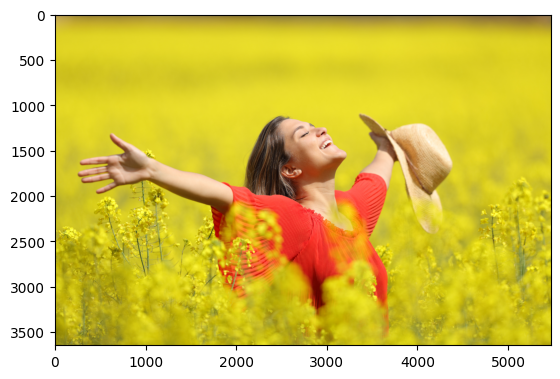

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Load Data

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 184 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
data_iterator

In [10]:
batch = data_iterator.next()

In [11]:
#images represented by numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [12]:
#image classes represented as 0(happy) and 1(sad)
batch[1]

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

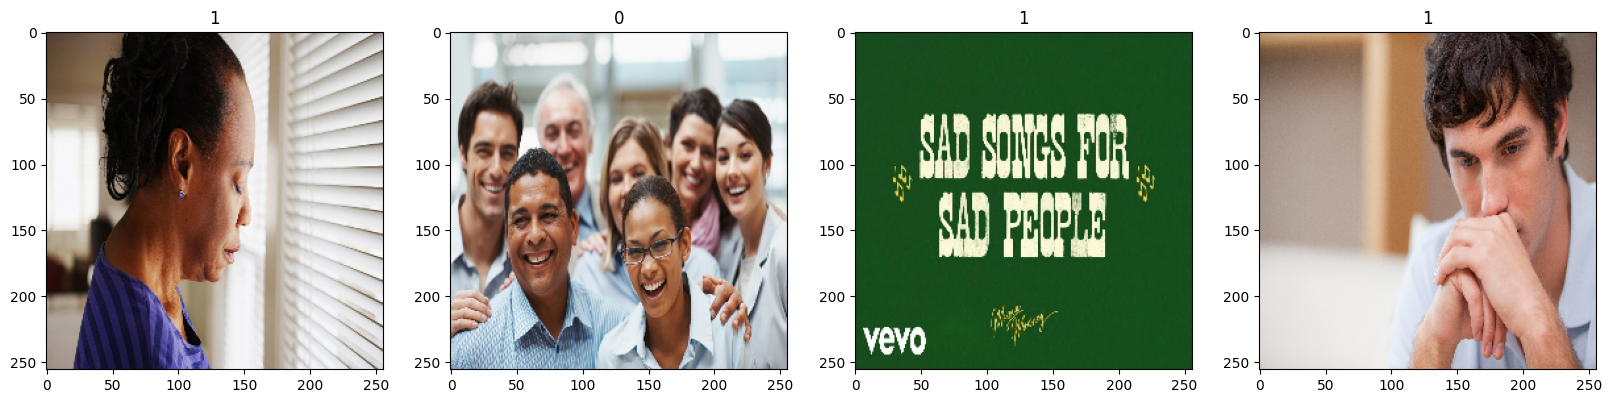

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

In [14]:
print(f"max value : {batch[0].max()}")
print(f"min value : {batch[0].min()}")

max value : 255.0
min value : 0.0


Scale data

In [15]:
data = data.map(lambda x,y:(x/255, y))
batch = data.as_numpy_iterator().next()

In [16]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


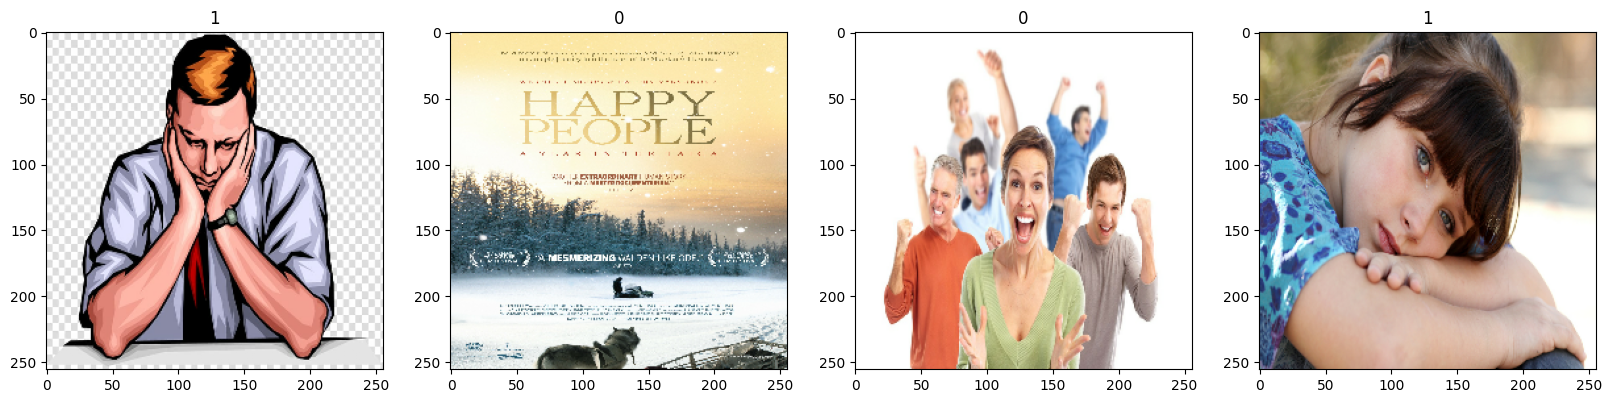

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

In [19]:
print(f"train size : {train_size}")
print(f"validation size : {val_size}")
print(f"test size : {test_size}")

train size : 4
validation size : 1
test size : 1


In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

Build Deep Learning Model

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Train

In [25]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
4/4 [==============================] - 19s 3s/step - loss: 2.5955 - accuracy: 0.5000 - val_loss: 2.1269 - val_accuracy: 0.3125
Epoch 2/20
4/4 [==============================] - 13s 3s/step - loss: 0.9654 - accuracy: 0.5859 - val_loss: 0.6271 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 13s 3s/step - loss: 0.6489 - accuracy: 0.6016 - val_loss: 0.6550 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 11s 2s/step - loss: 0.6530 - accuracy: 0.5781 - val_loss: 0.6688 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 0.5980 - accuracy: 0.6328 - val_loss: 0.6258 - val_accuracy: 0.5938
Epoch 6/20
4/4 [==============================] - 13s 3s/step - loss: 0.6291 - accuracy: 0.6250 - val_loss: 0.5179 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 12s 3s/step - loss: 0.6146 - accuracy: 0.6406 - val_loss: 0.5528 - val_accuracy: 0.5938
Epoch 8/20
4/4 [==================

Plot Performance

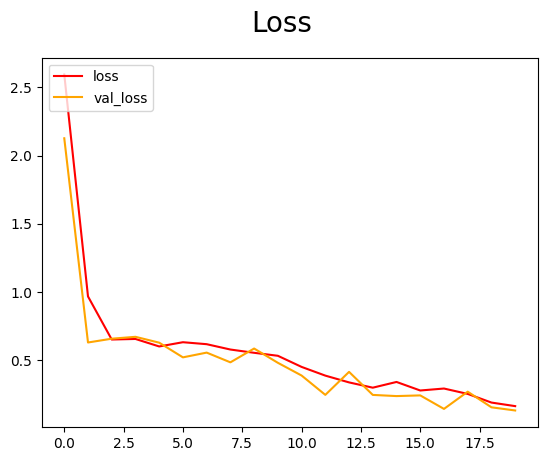

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

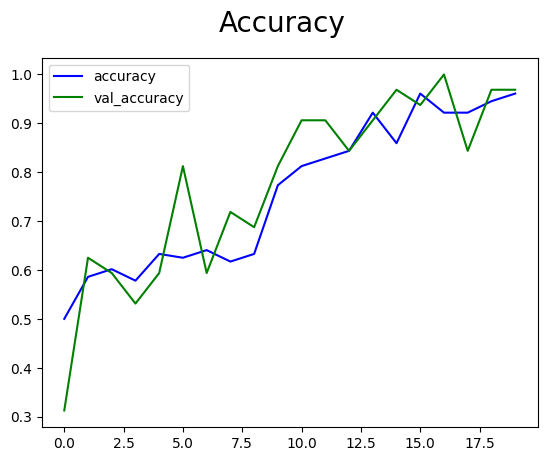

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

Evaluate

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 1s 660ms/step


In [30]:
print(f"Precison : {pre.result()}")
print(f"Recall : {re.result()}")
print(f"Accuarcy : {acc.result()}")

Precison : 1.0
Recall : 1.0
Accuarcy : 1.0


Test

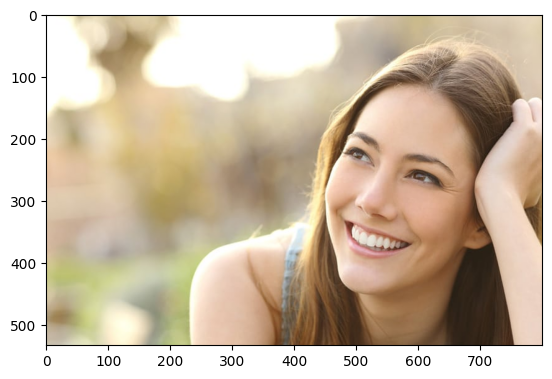

In [31]:
test_img = cv2.imread('testdata/happytestimg.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)
plt.show()

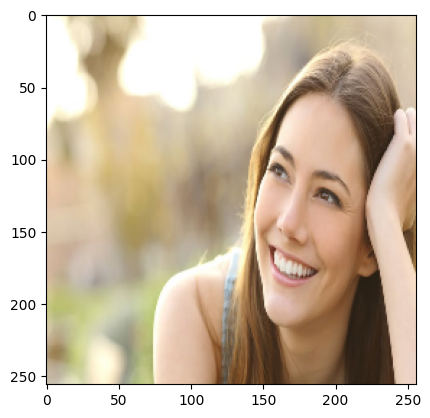

In [32]:
resize = tf.image.resize(test_img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
ypred = model.predict(np.expand_dims(resize/255, 0))
ypred

1/1 [==============================] - 0s 93ms/step


array([[0.27109715]], dtype=float32)

In [34]:
def predict(y):
    if y > 0.5:
        print("The image defines a sad person.")
    else:
        print("The image defines a happy person.")

In [35]:
predict(ypred[0][0])

The image defines a happy person.


# Save the Model

In [36]:
model.save('models/happysadmodel.keras')